In [1]:
import os
import numpy as np

osc_freq = 20
period = 1/osc_freq

network_path = "forKadri-FS1050-1"
input_name = f"SfN2022-forKadri-oscillating-{osc_freq}Hz-ramp-up-background"
sim_file_gj = os.path.join(network_path, "simulation", f"output-GJ-{input_name}.hdf5")
sim_file_nogj = os.path.join(network_path, "simulation", f"output-noGJ-{input_name}.hdf5")
fig_path = os.path.join(network_path, "figures")
sl = None
sls_gj = None
sls_nogj = None

In [2]:
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadNetworkSimulation

sl = SnuddaLoad(network_path)
sls_gj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_gj)
sls_nogj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_nogj)

Loading 1050 neurons with 20763 synapses and 10598 gap junctions
Loading forKadri-FS1050-1/simulation/output-GJ-SfN2022-forKadri-oscillating-20Hz-ramp-up-background.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
12: (FS_0, pb1ef6b01, mb1b67bcc)
18: (FS_0, p4feff98b, m86da4874)
22: (FS_0, pb1ef6b01, m15ae4048)
27: (FS_1, p31916918, m48f576bb)
77: (FS_0, pb1ef6b01, m15ae4048)
80: (FS_0, pb1ef6b01, m86da4874)
93: (FS_1, pf9439e45, m48f576bb)
95: (FS_1, p31916918, m48f576bb)
99: (FS_1, pf86c86e4, ma88f99b9)
106: (FS_0, p4feff98b, m4fdebda2)
111: (FS_1, pf86c86e4, m27aed108)
113: (FS_1, pf86c86e4, ma88f99b9)
117: (FS_0, p4feff98b, m4cd420e2)
124: (FS_0, pb1ef6b01, m15ae4048)
129: (FS_0, pb1ef6b01, m86da4874)
134: (FS_1, p31916918, m48f576bb)
162: (FS_1, p31916918, macdedfff)
178: (FS_0, p59a48310, m4cd420e2)
185: (FS_1, pf86c86e4, m868d56db)
188: (FS_1, pf9439e45, m2a6ab0d6)
198: (FS_1, pf86c86e4, ma88f99b9)
202: (FS_0, p4feff98b, m86da4874)

Loading 1050 neurons with 20763 synapses and 10598 gap junctions


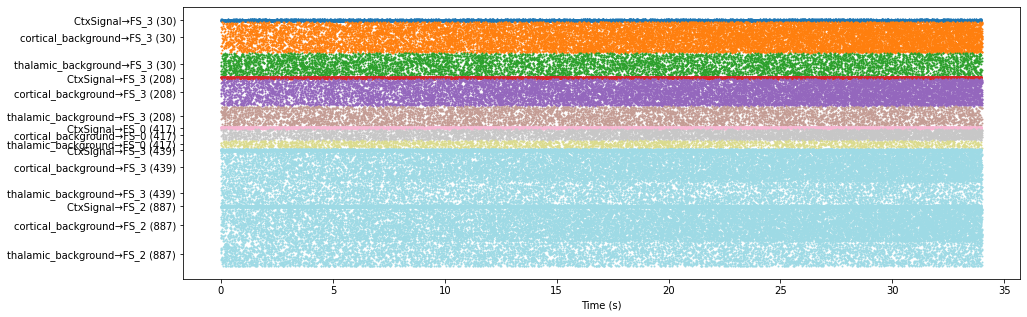

In [3]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, f"{input_name}.hdf5")
spi = PlotInput(input_file)
spi.plot_input(num_neurons=5, neuron_type="FS", fig_size=(15,5))

In [4]:
from snudda.plotting import SnuddaPlotSpikeRaster2

spr = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_gj, figure_path=fig_path,
                             snudda_load=sl, snudda_simulation_load=sls_gj)

spr2 = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_nogj, figure_path=fig_path,
                              snudda_load=sl, snudda_simulation_load=sls_nogj)

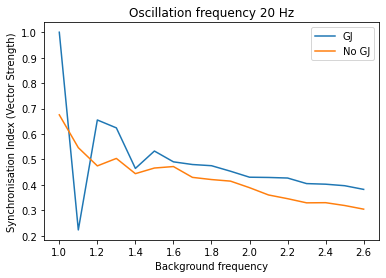

In [5]:
start_time = spi.config["FS"]["cortical_background"]["start"]
end_time =  spi.config["FS"]["cortical_background"]["end"]
background_frequency = spi.config["FS"]["cortical_background"]["frequency"]

synch_gj = []
synch_nogj = []

for st, et in zip(start_time, end_time):
    synch_gj.append(spr.calculate_period_synchrony(period=period, time_range=(st,et)))
    synch_nogj.append(spr2.calculate_period_synchrony(period=period, time_range=(st,et)))

synch_gj = np.array(synch_gj)
synch_nogj = np.array(synch_nogj)
    
import matplotlib.pyplot as plt

plt.figure()
plt.plot(background_frequency, synch_gj, label="GJ")
plt.plot(background_frequency, synch_nogj, label="No GJ")
plt.legend()
plt.xlabel("Background frequency")
plt.ylabel("Synchronisation Index (Vector Strength)")
plt.title(f"Oscillation frequency {osc_freq} Hz")
plt.savefig(f"{fig_path}/SfN2022-synchronisation-index-osc-{osc_freq}-Hz-background-varied.png")

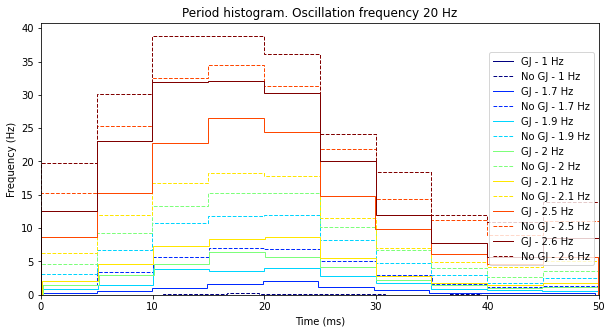

In [6]:
start_time = spi.config["FS"]["cortical_background"]["start"]
end_time =  spi.config["FS"]["cortical_background"]["end"]
background_frequency = spi.config["FS"]["cortical_background"]["frequency"]

idx = [0, 7, 9, 10, 11, 15, 16]
start_time = [start_time[x] for x in idx]
end_time = [end_time[x] for x in idx]
background_frequency = [background_frequency[x] for x in idx]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
colours = plt.cm.jet(np.linspace(0,1,len(start_time)))


for st, et, bg, colour in zip(start_time, end_time, background_frequency, colours):
    freq_gj, bins_gj = spr.calculate_period_histogram_mod(period=period, time_range=(st,et), neuron_id=None)
    freq_nogj, bins_nogj = spr2.calculate_period_histogram_mod(period=period, time_range=(st,et), neuron_id=None)

    plt.stairs(freq_gj, bins_gj*1e3, label=f"GJ - {bg} Hz", linestyle="solid", color=colour)
    plt.stairs(freq_nogj, bins_nogj*1e3, label=f"No GJ - {bg} Hz", linestyle="dashed", color=colour)
    
plt.legend(loc="center right")
plt.xlim((0, period*1e3))
plt.xlabel("Time (ms)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Period histogram. Oscillation frequency {osc_freq} Hz")
plt.savefig(f"{fig_path}/SfN2022-period-histogram-osc-{osc_freq}-Hz-background-varied.png")

from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc1 = PlotCrossCorrelogram(sim_file_gj, snudda_simulation_load=sls_gj)

from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc2 = PlotCrossCorrelogram(sim_file_nogj, snudda_simulation_load=sls_nogj)

start_time = spi.config["FS"]["cortical_background"]["start"]
end_time =  spi.config["FS"]["cortical_background"]["end"]
background_frequency = spi.config["FS"]["cortical_background"]["frequency"]

import matplotlib.pyplot as plt

plt.figure()

for st, et, freq in zip(start_time, end_time, background_frequency):
    bin_count_gj, bin_edges_gj = pcc1.calculate_all_pair_cross_correlogram(neuron_id=None, time_range=(st,et))  
    bin_count_nogj, bin_edges_nogj = pcc2.calculate_all_pair_cross_correlogram(neuron_id=None, time_range=(st,et))  
    
    plt.stairs(values=bin_count_gj, edges=bin_edges_gj*1e3, label=f"GJ freq {freq}", linestyle="solid")
    plt.stairs(values=bin_count_nogj, edges=bin_edges_nogj*1e3, label=f"noGJ freq {freq}", linestyle="dashed")
    
plt.xlabel("Time (ms)")
plt.ylabel("Count")
plt.legend()
plt.title("Oscillation frequency {osc_freq}, varying background")
plt.show()
plt.savefig(f"{fig_path}/SfN2022-cross-correlogram-osc-{osc_freq}-Hz-background-varied.png")